<a href="https://colab.research.google.com/github/ngochnn7/American-Manual-Alphabet-in-ASL-using-YOLO11/blob/main/ASLx50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

# Kết nối với Google Drive
drive.mount('/content/drive')

# Đặt tên thư mục mới là ASLx50
HOME = "/content/drive/MyDrive/ASLx50"

if not os.path.exists(HOME):
    os.makedirs(HOME)
    print(f"--- Đã tạo mới thư mục: {HOME} ---")
else:
    print(f"--- Thư mục {HOME} đã tồn tại ---")

# Di chuyển vào thư mục ASL1
%cd {HOME}

Mounted at /content/drive
--- Đã tạo mới thư mục: /content/drive/MyDrive/ASLx50 ---
/content/drive/MyDrive/ASLx50


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nJFo4AzJcc8Po5HyLKbY")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
version = project.version(1)
dataset = version.download("yolov11")

# Tải dataset về thư mục hiện tại (ASLx50)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov11:: 100%|██████████| 3468/3468 [00:27<00:00, 126.65it/s]


In [ ]:
from PIL import Image
import glob

# Tìm đường dẫn các file ảnh vừa tải về
image_path = glob.glob(f"{dataset.location}/train/images/*.jpg")[0]

with Image.open(image_path) as img:
    width, height = img.size
    print(f"Kích thước ảnh gốc: {width}x{height}")

# Gợi ý thiết lập
if width > 640:
    print("Khuyên dùng: imgsz=1024 (để đạt độ chính xác cao nhất)")
else:
    print("Khuyên dùng: imgsz=640 (độ chính xác tốt và chạy nhanh hơn)")

Kích thước ảnh gốc: 384x384
Khuyên dùng: imgsz=640 (độ chính xác tốt và chạy nhanh hơn)


In [ ]:
import os

train_path = f"{dataset.location}/train/images"
num_images = len([f for f in os.listdir(train_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
print(f"Tổng số ảnh dùng để huấn luyện: {num_images}")

Tổng số ảnh dùng để huấn luyện: 1512


In [ ]:
%cd {HOME}
!pip install ultralytics

/content/drive/MyDrive/ASLx50
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.0 MB/s eta 0:00:00


In [ ]:
project_name = "ASL_Detection"
run_name = "YOLO11x_imgsz640_e50"

!yolo task=detect mode=train \
  model=yolo11x.pt \
  data={dataset.location}/data.yaml \
  epochs=50 \
  imgsz=640 \
  batch=-1 \
  device=0 \
  project={project_name} \
  name={run_name} \
  exist_ok=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/ASLx50/American-Sign-Language-Letters-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

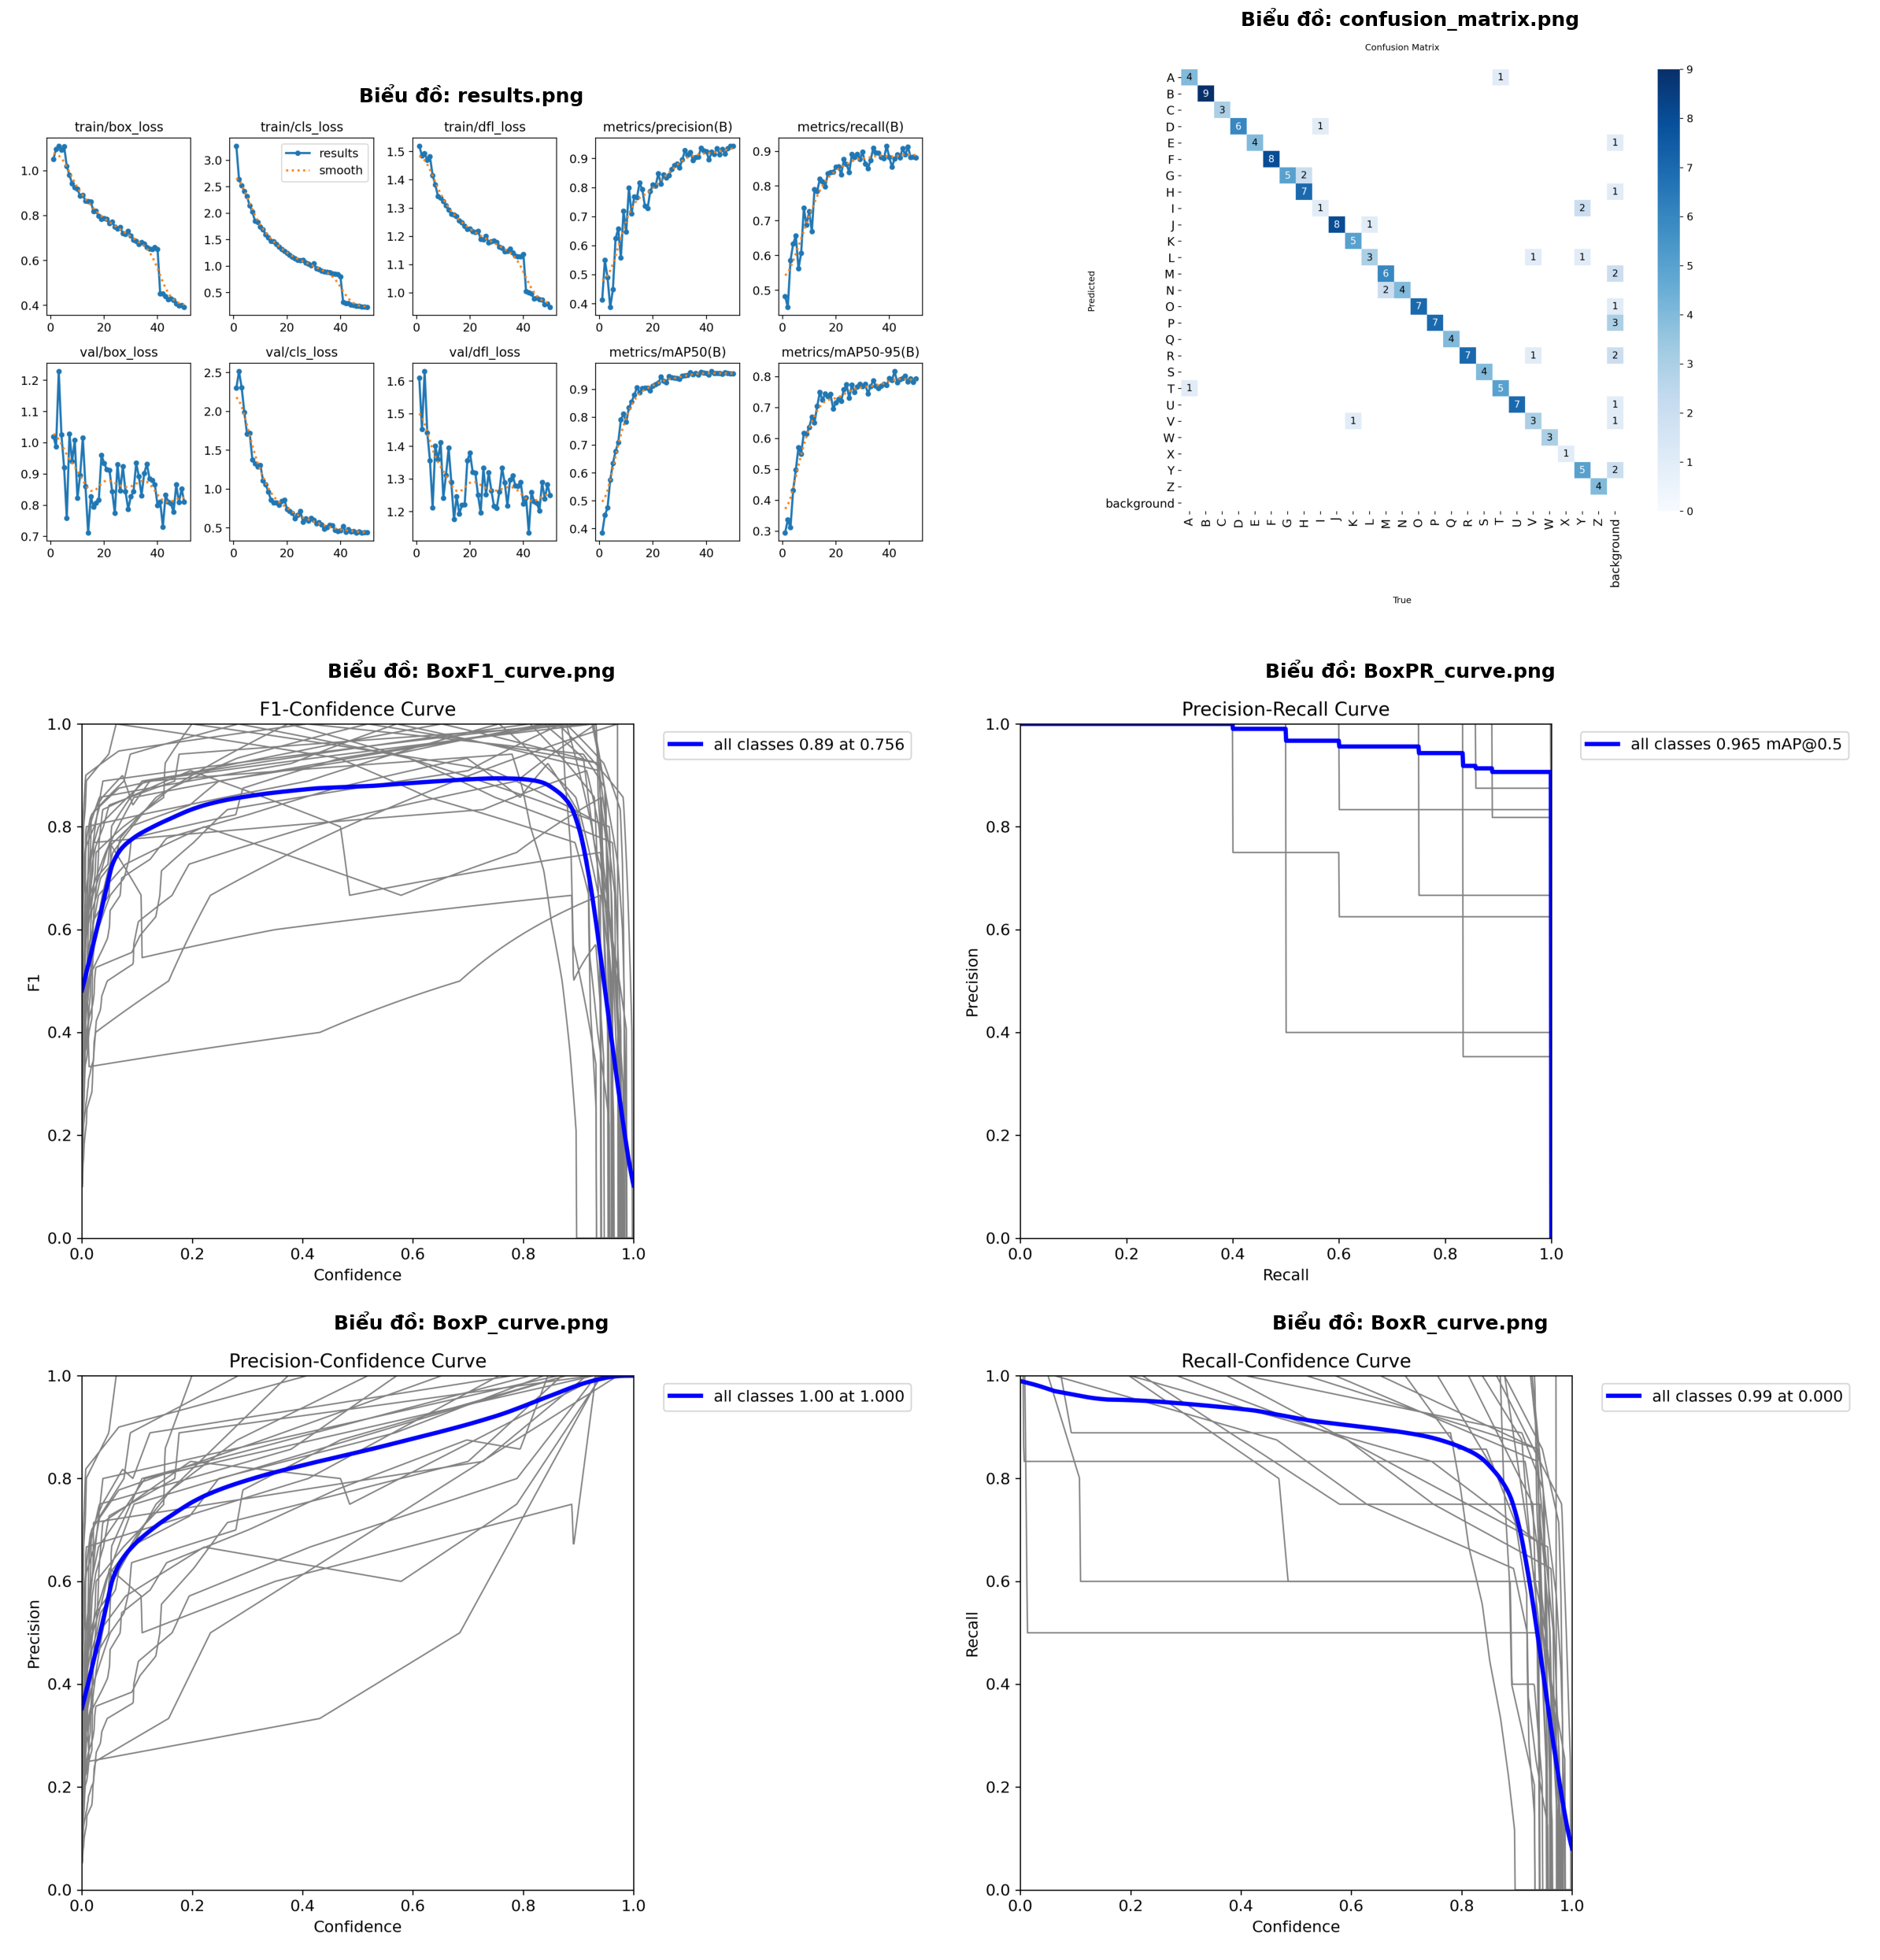

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Đường dẫn thư mục kết
results_dir = "/content/drive/MyDrive/ASLx50/ASL_Detection/YOLO11x_imgsz640_e50"

# Danh sách đầy đủ 6 biểu đồ
plots = [
    "results.png",           # Tổng hợp Loss và mAP
    "confusion_matrix.png",  # Ma trận nhầm lẫn
    "BoxF1_curve.png",       # Biểu đồ F1-Confidence
    "BoxPR_curve.png",       # Biểu đồ Precision-Recall
    "BoxP_curve.png",        # Biểu đồ Precision-Confidence
    "BoxR_curve.png"         # Biểu đồ Recall-Confidence
]

# Thiết lập khung hình (3 hàng x 2 cột)
plt.figure(figsize=(24, 25))

for i, plot_file in enumerate(plots):
    path = os.path.join(results_dir, plot_file)
    if os.path.exists(path):
        img = mpimg.imread(path)
        plt.subplot(3, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Biểu đồ: {plot_file}", fontsize=18, fontweight='bold')
    else:
        print(f"Cảnh báo: Không tìm thấy file {plot_file}")

plt.tight_layout()
plt.show()